# Importing Packages and Modules

In [1]:
from snowflake.snowpark.session import Session
import snowflake.snowpark.functions as F
import snowflake.snowpark.types as T
from snowflake.snowpark.window import Window
from sklearn.model_selection import train_test_split

import sys
import getpass
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Establishing SF Connection

In [3]:
connection_parameters = {
    "account": 'hg09621.central-india.azure',
    "user": 'SHANTHINIMCA',
    "password": 'Sgps@4565',
    "role": "ACCOUNTADMIN",
    "database": "TEST_DB_SMALL_NEW",
    "schema": "PUBLIC",
    "warehouse": "TEST_WH_SMALL_NEW"
}

session = Session.builder.configs(connection_parameters).create()

In [4]:
session.sql("show databases").show()

-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|"created_on"                      |"name"                 |"is_default"  |"is_current"  |"origin"                                            |"owner"       |"comment"                                          |"options"  |"retention_time"  |
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|2023-06-06 00:50:28.939000-07:00  |ANALYTICS              |N             |N             |                                                    |ACCOUNTADMIN  |                                                   |           |1                 |
|2023-05-11 07:27:40.661000-07:0

# Importing Data from CSV and Writing to SnowFlake

In [5]:
df = pd.read_csv("Covid_Data.csv")
df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


In [6]:
df.shape

(1048575, 21)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

In [8]:
#let's write dataset into snowflake
session.write_pandas(df, table_name='COVID_DATA', auto_create_table=True, overwrite=True)

# Importing SnowFlake table as Snowpark DataFrame

In [9]:
snowpark_df = session.table("COVID_DATA")

In [10]:
type(snowpark_df)

snowflake.snowpark.table.Table

In [11]:
print(f"Size of the table object: {(sys.getsizeof(snowpark_df)/1e6)} MB")

Size of the table object: 4.8e-05 MB


# EDA

In [12]:
snowpark_df.count()

1048575

In [13]:
len(snowpark_df.columns)

21

In [14]:
snowpark_df.schema.fields

[StructField('USMER', LongType(), nullable=True),
 StructField('MEDICAL_UNIT', LongType(), nullable=True),
 StructField('SEX', LongType(), nullable=True),
 StructField('PATIENT_TYPE', LongType(), nullable=True),
 StructField('DATE_DIED', StringType(), nullable=True),
 StructField('INTUBED', LongType(), nullable=True),
 StructField('PNEUMONIA', LongType(), nullable=True),
 StructField('AGE', LongType(), nullable=True),
 StructField('PREGNANT', LongType(), nullable=True),
 StructField('DIABETES', LongType(), nullable=True),
 StructField('COPD', LongType(), nullable=True),
 StructField('ASTHMA', LongType(), nullable=True),
 StructField('INMSUPR', LongType(), nullable=True),
 StructField('HIPERTENSION', LongType(), nullable=True),
 StructField('OTHER_DISEASE', LongType(), nullable=True),
 StructField('CARDIOVASCULAR', LongType(), nullable=True),
 StructField('OBESITY', LongType(), nullable=True),
 StructField('RENAL_CHRONIC', LongType(), nullable=True),
 StructField('TOBACCO', LongType(), 

In [15]:
for column in snowpark_df:
    print(column,'has',snowpark_df[[column]].distinct().count(),'unique values')

Column["USMER"] has 2 unique values
Column["MEDICAL_UNIT"] has 13 unique values
Column["SEX"] has 2 unique values
Column["PATIENT_TYPE"] has 2 unique values
Column["DATE_DIED"] has 401 unique values
Column["INTUBED"] has 4 unique values
Column["PNEUMONIA"] has 3 unique values
Column["AGE"] has 121 unique values
Column["PREGNANT"] has 4 unique values
Column["DIABETES"] has 3 unique values
Column["COPD"] has 3 unique values
Column["ASTHMA"] has 3 unique values
Column["INMSUPR"] has 3 unique values
Column["HIPERTENSION"] has 3 unique values
Column["OTHER_DISEASE"] has 3 unique values
Column["CARDIOVASCULAR"] has 3 unique values
Column["OBESITY"] has 3 unique values
Column["RENAL_CHRONIC"] has 3 unique values
Column["TOBACCO"] has 3 unique values
Column["CLASIFFICATION_FINAL"] has 7 unique values
Column["ICU"] has 4 unique values


In [16]:
snowpark_df.select("SEX").show()

---------
|"SEX"  |
---------
|1      |
|2      |
|2      |
|1      |
|2      |
|1      |
|1      |
|1      |
|1      |
|1      |
---------



In [17]:
snowpark_df[['CLASIFFICATION_FINAL']].describe().show()

--------------------------------------
|"SUMMARY"  |"CLASIFFICATION_FINAL"  |
--------------------------------------
|count      |1048575.0               |
|mean       |5.305653                |
|stddev     |1.8811653303205436      |
|max        |7.0                     |
|min        |1.0                     |
--------------------------------------



In [18]:
snowpark_df.group_by("CLASIFFICATION_FINAL").count().show()

------------------------------------
|"CLASIFFICATION_FINAL"  |"COUNT"  |
------------------------------------
|3                       |381527   |
|5                       |26091    |
|7                       |499250   |
|6                       |128133   |
|1                       |8601     |
|2                       |1851     |
|4                       |3122     |
------------------------------------



In [19]:
snowpark_df = snowpark_df.with_column('TARGET', F.when(F.col('CLASIFFICATION_FINAL')
                        < 4, 1).otherwise(0))

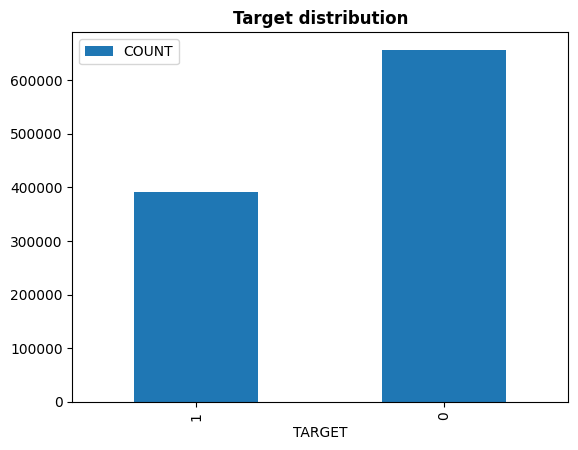

In [20]:
snowpark_df\
.group_by("TARGET").count().to_pandas().set_index("TARGET")\
.plot.bar()

plt.title("Target distribution",fontweight='semibold')
plt.show()

In [21]:
snowpark_df = snowpark_df.replace([97,99],value=None)

Input key or value type doesn't match the target column data type, this replacement was skipped. Column Name: "DATE_DIED", Type: StringType(), Input Key: 97, Type: <class 'int'>, Input Value: None, Type: <class 'NoneType'>
Input key or value type doesn't match the target column data type, this replacement was skipped. Column Name: "DATE_DIED", Type: StringType(), Input Key: 99, Type: <class 'int'>, Input Value: None, Type: <class 'NoneType'>


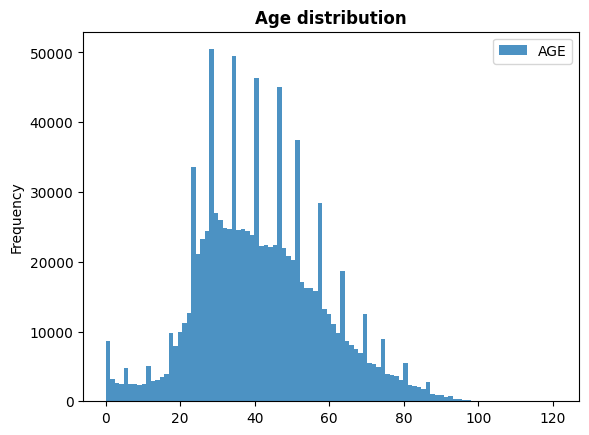

In [22]:
snowpark_df\
.select('AGE').to_pandas()\
.plot.hist(bins=100,alpha=0.8)

plt.title("Age distribution",fontweight='semibold')
plt.show()

In [23]:
snowpark_df.select(F.when(F.col('AGE') < 21, 'YOUNG'
                   ).otherwise(F.when(F.col('AGE') < 49, 'ADULT'
                   ).otherwise('OLD ADULT')).as_('OO'), 'AGE').show()

---------------------
|"OO"       |"AGE"  |
---------------------
|OLD ADULT  |65     |
|OLD ADULT  |72     |
|OLD ADULT  |55     |
|OLD ADULT  |53     |
|OLD ADULT  |68     |
|ADULT      |40     |
|OLD ADULT  |64     |
|OLD ADULT  |64     |
|ADULT      |37     |
|ADULT      |25     |
---------------------



In [24]:
snowpark_df = snowpark_df.with_column(
    "AGE_BKT",
    F.when(F.col("AGE") < 21, "YOUNG").otherwise(
        F.when(F.col("AGE") < 49, "ADULT").otherwise("OLD ADULT")
    ),
)

In [25]:
age_bkt_df = snowpark_df.select(
    F.col("AGE_BKT"),
    F.when((F.col("AGE_BKT")=='YOUNG') & (F.col("TARGET")==1),1).otherwise(0).as_("YOUNG_"),
    F.when((F.col("AGE_BKT")=='ADULT') & (F.col("TARGET")==1),1).otherwise(0).as_("ADULT_"),
    F.when((F.col("AGE_BKT")=='OLD ADULT') & (F.col("TARGET")==1),1).otherwise(0).as_("OLD_ADULT_")
)

In [26]:
age_bkt_df.group_by(F.col("AGE_BKT")).count().show()

-----------------------
|"AGE_BKT"  |"COUNT"  |
-----------------------
|OLD ADULT  |342413   |
|ADULT      |628554   |
|YOUNG      |77608    |
-----------------------



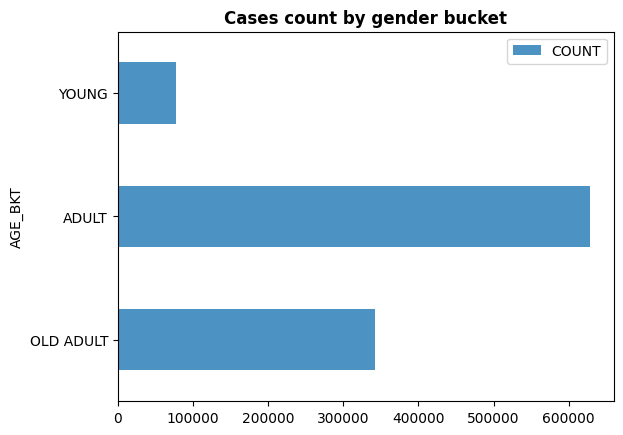

In [27]:
age_bkt_df.group_by(F.col("AGE_BKT")).count().to_pandas().set_index("AGE_BKT")\
.plot.barh(alpha=0.8)

plt.title("Cases count by gender bucket",fontweight='semibold')
plt.show()

In [28]:
age_bkt_df.select(
    ((F.sum("YOUNG_") * 100 ) / F.count("YOUNG_")).as_("YOUNG % OF CASES"),
    ((F.sum("ADULT_") * 100) / F.count("ADULT_")).as_("ADULT % OF CASES"),
    ((F.sum("OLD_ADULT_") * 100) / F.count("OLD_ADULT_")).as_("OLD_ADULT % OF CASES")
).show()

--------------------------------------------------------------------
|"YOUNG % OF CASES"  |"ADULT % OF CASES"  |"OLD_ADULT % OF CASES"  |
--------------------------------------------------------------------
|1.534463            |20.877858           |14.969745               |
--------------------------------------------------------------------



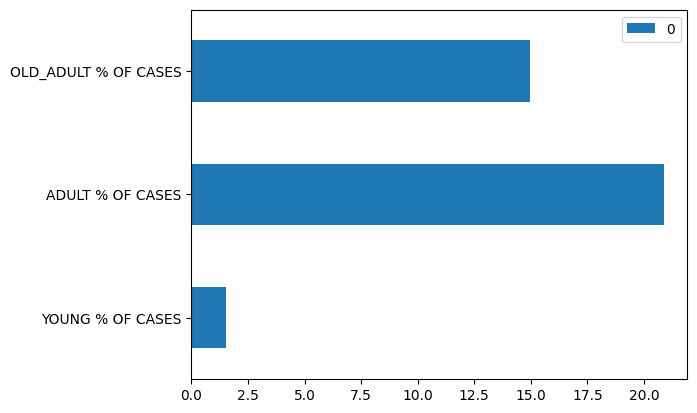

In [29]:
age_bkt_df.select(
    (F.as_double((F.sum("YOUNG_") ) * 100 / F.count("YOUNG_"))).as_("YOUNG % OF CASES"),
    (F.as_double((F.sum("ADULT_")) * 100 / F.count("ADULT_"))).as_("ADULT % OF CASES"),
    (F.as_double((F.sum("OLD_ADULT_")) * 100 / F.count("OLD_ADULT_"))).as_("OLD_ADULT % OF CASES")
).to_pandas().T\
.plot.barh()

plt.show()


In [30]:
for col in snowpark_df.columns:
    snowpark_df.with_column(f"IS_{col}_NULL",F.when(F.is_null(col),"YES").otherwise("NO")).group_by(f'IS_{col}_NULL').count().show()

-----------------------------
|"IS_USMER_NULL"  |"COUNT"  |
-----------------------------
|NO               |1048575  |
-----------------------------

------------------------------------
|"IS_MEDICAL_UNIT_NULL"  |"COUNT"  |
------------------------------------
|NO                      |1048575  |
------------------------------------

---------------------------
|"IS_SEX_NULL"  |"COUNT"  |
---------------------------
|NO             |1048575  |
---------------------------

------------------------------------
|"IS_PATIENT_TYPE_NULL"  |"COUNT"  |
------------------------------------
|NO                      |1048575  |
------------------------------------

---------------------------------
|"IS_DATE_DIED_NULL"  |"COUNT"  |
---------------------------------
|NO                   |1048575  |
---------------------------------

-------------------------------
|"IS_INTUBED_NULL"  |"COUNT"  |
-------------------------------
|YES                |855869   |
|NO                 |192706   |
-----

# Droping Columns

In [31]:
snowpark_df = snowpark_df.drop(["ICU","DATE_DIED","CLASIFFICATION_FINAL","AGE_BKT"])

In [32]:
snowpark_df.dropna().group_by("TARGET").count().show()

----------------------
|"TARGET"  |"COUNT"  |
----------------------
|1         |41926    |
|0         |36262    |
----------------------



In [33]:
snowpark_df = snowpark_df.dropna()

# Writing the Processed data into SnowFlake

In [34]:
snowpark_df.write.save_as_table(
    table_name='COVID19_RECORDS_PROCESSED',
    mode='overwrite'
)

In [35]:
del snowpark_df
del df

# Extracting the Processed Data from Snowflake

In [36]:
train_data = session.table("COVID19_RECORDS_PROCESSED")

In [37]:
train_data.count()

78188

In [38]:
train_data.select(F.sum(F.col("TARGET"))).show()

---------------------
|"SUM(""TARGET"")"  |
---------------------
|41926              |
---------------------



In [39]:
session.sql('CREATE OR REPLACE STAGE ML_MODELS').show()

----------------------------------------------
|"status"                                    |
----------------------------------------------
|Stage area ML_MODELS successfully created.  |
----------------------------------------------



# Stored procedure for training the model

In [40]:
def train_dt_procedure(
    session: Session,
    training_table: str,
    feature_cols: list,
    target_col: str,
    model_name: str,
) -> T.Variant:
    
    """
    This will be our training procedure. Later we will register this as snowflake procedure.
    
    training_table: snowflake table name to be used for training task
    feature_cols: list of columns to be used in training
    target_col: target column to be used
    model_name: model name to used for model saving purpose
    
    """

    #convert as pandas DF, rest of the steps similar to the local model training and saving.
    local_training_data = session.table(training_table).to_pandas()

    from sklearn.linear_model import LogisticRegression

    X = local_training_data[feature_cols]
    y = local_training_data[target_col]

    model = LogisticRegression()
    model.fit(X, y)

    from joblib import dump

    dump(model, "/tmp/" + model_name)
    session.file.put(
        "/tmp/" + model_name, "@ML_MODELS", auto_compress=False, overwrite=True
    )

# Registering the stored procedure

In [41]:
sproc_train_dt_model = session.sproc.register(
                    func=train_dt_procedure, 
                    name='sproc_train_dt_model', 
                    is_permanent=True, 
                    replace=True, 
                    stage_location='@ML_MODELS', 
                    packages=[
                        'snowflake-snowpark-python',
                        'scikit-learn',
                        'joblib']
)

# Spiltting the data into train and test

In [42]:
train_data_pd = train_data.to_pandas()

In [43]:
#create train and test dataframes
train_data_pd,test_data_pd = train_test_split(
                                        train_data_pd,
                                        stratify=train_data_pd['TARGET'],
                                        test_size=0.2
)

In [44]:
#writing as tempoary tables for mode training and inferencing part
session.write_pandas(train_data_pd, table_name='TRAIN_DATA_TMP', auto_create_table=True,table_type="temporary")
session.write_pandas(test_data_pd, table_name='TEST_DATA_TMP', auto_create_table=True,table_type="temporary")

# Calling the Stored procedure

In [45]:
feature_cols = train_data.columns
feature_cols.remove('TARGET')
target_col = 'TARGET'
model_name = 'logisticregression.model'

model_response = sproc_train_dt_model('TRAIN_DATA_TMP', 
                                            feature_cols, 
                                            target_col,
                                            model_name, 
                                            session=session
                                           )

In [46]:
session.sql('LIST @ML_MODELS').show()

-----------------------------------------------------------------------------------------------------------------
|"name"                              |"size"  |"md5"                             |"last_modified"               |
-----------------------------------------------------------------------------------------------------------------
|ml_models/logisticregression.model  |1488    |d62db62a103c466bb5b71913e72fb76f  |Wed, 7 Jun 2023 07:38:54 GMT  |
-----------------------------------------------------------------------------------------------------------------



# UDF for model testing

In [47]:
def udf_predict_risk_score(*args) -> float:
    import os
    import sys
    from joblib import load
    
    IMPORT_DIRECTORY_NAME = "snowflake_import_directory"
    import_dir = sys._xoptions[IMPORT_DIRECTORY_NAME]
    model_name = 'logisticregression.model'
    model = load(import_dir+model_name)
    scored_data = model.predict(pd.DataFrame([args]))[0]
    return scored_data


# Registering the UDF

In [48]:
udf_risk_score_model = session.udf.register(
                            func=udf_predict_risk_score, 
                            name="udf_risk_score_model", 
                            stage_location='@ML_MODELS',
                            input_types=[T.FloatType()]*len(feature_cols),
                            return_type = T.FloatType(),
                            replace=True, 
                            is_permanent=True, 
                            imports=['@ML_MODELS/logisticregression.model'],
                            packages=['scikit-learn==1.1.1','pandas','joblib'], 
                            session=session
)

In [49]:
test_data_sf = session.table("TEST_DATA_TMP")

# Calling the UDF on test data for prediction

In [50]:
test_data_sf = test_data_sf.with_column('PREDICTION', udf_risk_score_model(*feature_cols))

In [51]:
test_data_sf = test_data_sf.with_column('PREDICTION',F.when(F.col('PREDICTION') > 0.5,1).otherwise(0))

In [52]:
def get_model_report(test_df):
    from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score,ConfusionMatrixDisplay
    
    target = test_df.select("TARGET").to_pandas()
    predictions = test_df.select("PREDICTION").to_pandas()
    
    cm = confusion_matrix(target,predictions)
    precision = precision_score(target,predictions)
    recall = recall_score(target,predictions)
    f1= f1_score(target,predictions)
   
    print(f"Model perfomances Recall: {recall:.2}, Precision: {precision:.2}\n")
    
    cmd = ConfusionMatrixDisplay(cm)
    cmd.plot()

# Model Performance

Model perfomances Recall: 0.71, Precision: 0.61



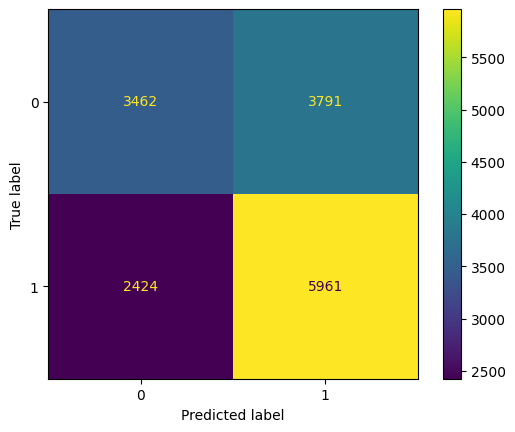

In [53]:
get_model_report(test_df=test_data_sf)
